# Maquinas de Vectores de Soporte

Nota: La presente practica es resuelta usando python 3 y jupyter notebook. Para la presentacion de resultados se oculto el codigo para facilitar su lectura. El notebook con el codigo fuente se encuentra disponible en el siguiente repositorio: https://github.com/davidGCR/SVM-Tarea , existen dos notebooks en el repositorio:
- SVM-practica-completa.ipynb: Contiene todo el codigo fuente de todas las preguntas de la practica.
- Parte III-Implementacion.ipynb: Contiene el codigo fuente solo de la parte III de la practica.

Para la ejecucion de los mismos siga los pasos descritos en el README del repositorio.

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Para visualizar el codigo, haga click <a href="javascript:code_toggle()">aqui</a>.''')

## I. Preguntas de teoria

**Sea el conjunto $S={((1,6),-1),((4,9),-1),((4.6),-1),((5,1),1),((9,5),1),((9,1),1)}$ y un conjunto de hyperplanos $H={H1,H2,H3,H4}$ definidos como $H1:x_1-x_2-1=0, H2: 2x_1-7x_2+32 =0, H3: \sqrt{0.5x_1} - \sqrt{0.5x_2}-\sqrt{0.5}=0, H4: 2x_1-7x_2-32=0$**

**1. Grafique**

Primero visualizamos S de forma tabulada y graficamos.

In [1]:
# @hidden_cell
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
import pandas as pd

In [2]:
#Hyperplanos
def h1(x1, x2):
    return x1-x2-1
def h2(x1, x2):
    return 2*x1-7*x2+32
def h3(x1, x2):
    return np.sqrt(0.5)*x1 - np.sqrt(0.5)*x2-np.sqrt(0.5)
def h4(x1, x2):
    return 2*x1-7*x2-32

In [3]:
n = 6 #numero de ejemplos
m = 2 #numero de variables
x_1 = np.array([1,4,4,5,9,9])
x_2 = np.array([6,9,6,1,5,1])
y=np.array([-1,-1,-1,1,1,1])
y=y.reshape(y.shape[0],1)
X=np.array([np.transpose(x_1),np.transpose(x_2)])
X=np.transpose(X)

In [4]:
x1 = np.linspace(X.min()-1, X.max()+1,20)
x2 = np.linspace(X.min()-1, X.max()+1,20)
XX, YY = np.meshgrid(x1, x2)
# print('X shape:',X.shape)
# print('y shape:',y.shape)
columns_new = ['x1', 'x2','y']
pd.DataFrame(np.append(X,y,axis=1), columns=columns_new)

,x1,x2,y
0,1,6,-1
1,4,9,-1
2,4,6,-1
3,5,1,1
4,9,5,1
5,9,1,1


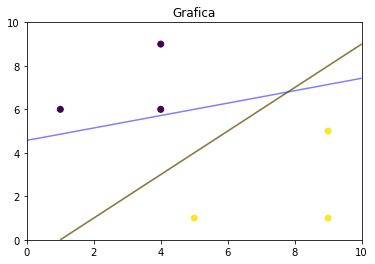

In [5]:
ax = plt.subplot(111)
plt.scatter(X[:,0], X[:,1], c=y[:,0])
plt.title("Grafica")

c1 = ax.contour(XX, YY, h1(XX,YY), levels=[0],colors='red', alpha=0.5)
c2 = ax.contour(XX, YY, h2(XX,YY), levels=[0],colors='blue', alpha=0.5)

y2 = np.linspace(0, X.max()+1,20)
XX, YY = np.meshgrid(x1, y2)
c3 = ax.contour(XX, YY, h3(XX,YY), levels=[0],colors='green', alpha=0.5)

In [6]:
y2 = np.linspace(-5, X.max()+1,20)
XX, YY = np.meshgrid(x1, y2)
c4 = ax.contour(XX, YY, h4(XX,YY), levels=[0],colors='black', alpha=0.5)

lines=[c1.collections[0],c2.collections[0],c3.collections[0],c4.collections[0]]
labels=['H1','H2','H3','H4']
ax.legend(lines,labels,loc='upper right', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1)
plt.show()

**2. Encuentre los parametros $w$ y $b$ que definen los hiperplanos y luego determine si son hiperplanos de separacion.**


Sea la ecuacion general de un hiperplano:
$$D(x)= <w,x> + b$$ 
Podemos escribir los hiperplanos de la siguiente manera:

- H1:
$$D(x) = x1-x2-1 = \begin{bmatrix}1 & -1\end{bmatrix}
\begin{bmatrix}x1 \\\ x2\end{bmatrix} - 1$$

$$w_1=\begin{bmatrix}1 \\\ -1\end{bmatrix}, b_1=\begin{bmatrix}-1 \\\ -1\end{bmatrix}$$

- H2:
$$D(x) = 2x1-7x2+32 = \begin{bmatrix}2 & -7\end{bmatrix}
\begin{bmatrix}x1 \\\ x2\end{bmatrix} + 32$$
$$w_2=\begin{bmatrix}2 \\\ -7\end{bmatrix}, b_2=\begin{bmatrix}32 \\\ 32\end{bmatrix}$$

- H3:
$$D(x) = \sqrt{0.5}x1 - \sqrt{0.5}x2-\sqrt{0.5}
=  \begin{bmatrix}\sqrt{0.5} & -\sqrt{0.5}\end{bmatrix} \begin{bmatrix}x1 \\\ x2\end{bmatrix} - \sqrt{0.5}
$$
$$w_3=\begin{bmatrix}\sqrt{0.5} \\\ -\sqrt{0.5}\end{bmatrix}, b_3=\begin{bmatrix}-\sqrt{0.5} \\\ -\sqrt{0.5}\end{bmatrix}$$

- H4:
$$D(x) = 2x1-7x2-32 = \begin{bmatrix}2 & -7\end{bmatrix}
\begin{bmatrix}x1 \\\ x2\end{bmatrix} - 32$$
$$w_4=\begin{bmatrix}2 \\\ -7\end{bmatrix}, b_4=\begin{bmatrix}-32 \\\ -32\end{bmatrix}$$

Para que un hiperplano sea un hyperplano de separacion debe cumplir la siguiente restriccion:

$$y_i(<w,x> + b) \geq 0,  \quad i=1,..,n$$

Dicha restriccion se define en la siguiente funcion.

In [7]:
#funcion que calcula la restriccion de hiperplano de separacion
def restriction(X,b,W,Y):
    r = (np.dot(X,W)+b)
    r = r*Y
    return r


A continuacion evaluaremos los hiperplanos calculando la restriccion para cada uno de ellos. La siguiente tabla muestra los resultados de calcular la restriccion anterior para cada hiperplano.

In [8]:
w1, b1 = np.array([1,-1]),-1 
w1 = w1.reshape(w1.shape[0],1)
w2, b2 = np.array([2,-7]),32 
w2 = w2.reshape(w2.shape[0],1)
w3, b3 = np.array([np.sqrt(0.5),-np.sqrt(0.5)]),-np.sqrt(0.5) 
w3 = w3.reshape(w3.shape[0],1)
w4, b4 = np.array([2,-7]),-32 
w4 = w4.reshape(w4.shape[0],1)


In [9]:
H1 = restriction(X,b1,w1,y)
H2 = restriction(X,b2,w2,y)
H3 = restriction(X,b3,w3,y)
H4 = restriction(X,b4,w4,y)
data = np.array([H1,H2,H3,H4])
# data = np.asarray(H1).append(H2)
data = data.reshape(data.shape[0],data.shape[1])
data = np.transpose(data)
columns_new = ['H1', 'H2','H3','H4']
pd.DataFrame(data, columns=columns_new)

,H1,H2,H3,H4
0,6.0,8.0,4.242641,72.0
1,6.0,23.0,4.242641,87.0
2,3.0,2.0,2.121320,66.0
3,3.0,35.0,2.121320,-29.0
4,3.0,15.0,2.121320,-49.0
5,7.0,43.0,4.949747,-21.0


Observamos en los resultados anteriores que el hiperplano $H4$ no es un hiperplano de separacion debido a que no cumple la restriccion para los 3 ultimos ejemplos(menores que cero), mientras que los hiperplanos $H1, H2, H3$ si son hiperplanos de separacion.

**3. En el conjunto H, ¿cuantos hiperplanos iguales existen?. En el caso de que existan, ¿cuales son estos?. Fundamente**

Si analizamos la grafica de los hiperplanos podemos observar que las rectas $H1$ y $H3$ son iguales(coincidentes), para comprobar esto un hyperplano debe ser multiplo de otro.


- H1:
$$D_1(x) = x1-x2-1 = 0$$

- H3:
$$D_3(x) = \sqrt{0.5}x1 - \sqrt{0.5}x2-\sqrt{0.5}
= 0$$

$$D_1(x)=\frac{1}{\sqrt{0.5}}D_3(x)$$
$$x1-x2-1 = \frac{1}{\sqrt{0.5}}(\sqrt{0.5}x1 - \sqrt{0.5}x2-\sqrt{0.5})$$

**4. Calcule el margen $τ$ para cada hiperplano de separacion. Luego, suponga que el conjunto H contiene al
hiperplano optimo, $H^{*}$, ¿cual serıa $H^{*}$? Fundamente.**

Para resolver esta pregunta sabemos por definicion que el margen de un hyperplano es la distancia minima entre dicho hiperplano y el ejemplo mas cercano. La distancia de cada ejemplo a el hyperplano de define como:
$$\frac{|D({x^i})|}{||w||}$$

La siguiente funcion calcula la distancia minima de los ejemplos de entrenamiento a los hiperplanos. (Solo se calcula los margenes de los hiperplanos de seapracion antes identificados)

In [10]:
##Funcion que calcula el margen de los hiperplanos
def margen():
    m1 = (1/np.linalg.norm(w1))*np.abs((h1(X[:,0],X[:,1])))
    m2 = (1/np.linalg.norm(w2))*np.abs((h2(X[:,0],X[:,1])))
    m3 = (1/np.linalg.norm(w3))*np.abs((h3(X[:,0],X[:,1])))
    
    margenes = {'m1':m1,
               'm2':m2,
               'm3':m3}
    return margenes

In [11]:
m=margen()
print('margen de H1: ',m['m1'].min())
print('margen de H2: ',m['m2'].min())
print('margen de H3: ',m['m3'].min())

m_optimo = m['m1'].min()

margen de H1:  2.1213203435596424
margen de H2:  0.27472112789737807
margen de H3:  2.121320343559643


Si suponemos que el conjunto de hiperplanos contiene un hiperplano optimo $H^*$ este seria el que tiene el mayor margen. En este caso serian los hiperplanos $H1$ y $H3$ por ser iguales.

**5. ¿Cuales son los vectores de soporte del hiperplano $H^{*}$ escogido en la pregunta anterior?. Fundamente.(No necesita encontrar los valores $α$ )**

Se sabe por teoria que los vectores de soporte al hiperplano optimo son aquellos ejemplos $x^{(i)}$ que cumplen la igualdad:
$$y^{(i)}(<w,x^{(i)}> + b)=1$$ 

In [12]:
def vectores_soporte(X,b,w,y):
    D = restriction(X,b,w,y)
    for i in range(D.shape[0]):
        if D[i]==1:
            print('v1: x%i',i)
    return D

In [13]:
# print(vectores_soporte(X,b1,w1,y))
r = (np.dot(X,w1)+b1)
# r = r*Y–
r, y, 1/np.linalg.norm(w1)


(array([[-6],
        [-6],
        [-3],
        [ 3],
        [ 3],
        [ 7]]), array([[-1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [ 1]]), 0.7071067811865475)

**6. Demuestre la primera condicion KKT, i.e, (Ec. 7 de las diapositivas)**

Sea la ecuacion (7):
$$\begin{equation}
\frac{\partial L}{\partial w}(w^*,b^*,a^*) = w^* - \sum_{i=1}^{m}\alpha_i y^{(i)}x^{(i)} 
\end{equation}$$
Sabemos que $L$ se define como:
$$\begin{equation}
L(w,b,\alpha) = \frac{1}{2}||w||^2 - \sum_{i=1}^{m}\alpha_i [y^{(i)}(w^T
x^{(i)}+b)-1] 
\end{equation}$$


Si descomponemos $L$:
$$\begin{equation}
L(w,b,\alpha) = \frac{1}{2}||w||^2 - 
\sum_{i=1}^{m}\alpha_i y^{(i)}w^Tx^{(i)} + 
\sum_{i=1}^{m}\alpha_i y^{(i)}b - 
\sum_{i=1}^{m}\alpha_i
\end{equation}$$

Ahora calculamos la dervivada de cada termino:
$$\begin{equation}
\frac{\partial L}{\partial w}(w^*,b^*,a^*) = \frac{\partial (\frac{1}{2}||w||^2)}{\partial w}-
\frac{\partial (\sum_{i=1}^{m}\alpha_i y^{(i)}w^T x^{(i)})}{\partial w} +
\frac{\partial (\sum_{i=1}^{m}\alpha_i y^{(i)}b)}{\partial w}-
\frac{\partial (\sum_{i=1}^{m}\alpha_i)}{\partial w}
\end{equation}$$


Resolviendo termino por termino, calculamos la derivada para cada termino:
- 1er termino:
$$\frac{\partial (\frac{1}{2}||w||^2)}{\partial w} = 
[\frac{\partial (\frac{1}{2}<w,w>)}{\partial w_1},\frac{\partial (\frac{1}{2}<w,w>)}{\partial w_2},...,\frac{\partial (\frac{1}{2}<w,w>)}{\partial w_m}]$$

$$ = [\frac{\partial (\frac{1}{2}[w_1,w_2,...,w_m]^t[w_1,w_2,...,w_m])}{\partial w_1},\frac{\partial (\frac{1}{2}[w_1,w_2,...,w_m]^t[w_1,w_2,...,w_m])}{\partial w_2},...,\frac{\partial (\frac{1}{2}[w_1,w_2,...,w_m]^t[w_1,w_2,...,w_m])}{\partial w_m}]$$

$$ = [\frac{\partial (\frac{1}{2}(w_1̣^2,w_2^2,...,w_m^2))}{\partial w_1},\frac{\partial (\frac{1}{2}(w_1̣^2,w_2^2,...,w_m^2))}{\partial w_2},...,\frac{\partial (\frac{1}{2}(w_1̣^2,w_2^2,...,w_m^2))}{\partial w_m}]$$

$$ = [2*\frac{1}{2}w_1̣,2*\frac{1}{2}w_2,...,2*\frac{1}{2}w_m]$$
$$ = 2*\frac{1}{2}w $$
$$= w$$

- 2do termino: 
$$\frac{\partial (\sum_{i=1}^{m}\alpha_i y^{(i)} w^T x^{(i)})}{\partial w}= \frac{\partial (\alpha_1 y_1 w^T x_1+\alpha_2 y_2 w^T x_2+...+\alpha_m y_m w^T x_m)}{\partial w}$$
$$=\frac{\partial (\alpha_1 y_1 w^T x_1)}{\partial w}+\frac{\partial (\alpha_2 y_2 w^T x_2)}{\partial w}+...+\frac{\partial (\alpha_m y_m w^T x_m)}{\partial w}$$

$$=\alpha_1 y_1 x_1+\alpha_2 y_2  x_2+...+\alpha_m y_m x_m $$
$$= \sum^{m}_{i=1}\alpha_i y^{(i)}x^{(i)}$$


- 3er termino:
$$\frac{\partial (\sum_{i=1}^{m}\alpha_i y^{(i)}b)}{\partial w} = [0,0,...,0]$$
- 4to termino:
$$\frac{\partial (\sum_{i=1}^{m}\alpha_i)}{\partial w}=[0,0,...,0]$$

Si sumamos las derivadas anteriores tenemos:
$$\begin{equation}
\frac{\partial L}{\partial w}(w^*,b^*,a^*) = w^* - \sum_{i=1}^{m}\alpha_i y^{(i)}x^{(i)}+[0,0,...,0]+[0,0,...,0]
\end{equation}$$
$$\begin{equation}
\frac{\partial L}{\partial w}(w^*,b^*,a^*) = w^* - \sum_{i=1}^{m}\alpha_i y^{(i)}x^{(i)}
\end{equation}$$

**Sea el conjunto $$N = {((1, 6), −1),((4, 9), −1),((4, 6), −1),((5, 1), 1),((9, 5), 1),((9, 1), 1),((0, 3), 1),((2, 2), −1),
((3, 1), −1)}$$ y el hiperplano $H_1$ definido anteriormente.**

**7. Usando cualquier lenguaje de programacion, grafique $N$ y $H_1$.**


Vista tabulada de N.

In [14]:
n = 6 #numero de ejemplos
m = 2 #numero de variables
x_1 = np.array([1,4,4,5,9,9,0,2,3])
x_2 = np.array([6,9,6,1,5,1,3,2,1])
y   = np.array([-1,-1,-1,1,1,1,1,-1,-1])
y=y.reshape(y.shape[0],1)
X=np.array([np.transpose(x_1),np.transpose(x_2)])
X=np.transpose(X)

In [15]:
x1 = np.linspace(X.min()-1, X.max()+1,20)
x2 = np.linspace(X.min()-1, X.max()+1,20)
XX, YY = np.meshgrid(x1, x2)
print('X shape:',X.shape)
print('y shape:',y.shape)
columns_new = ['x1', 'x2','y']
pd.DataFrame(np.append(X,y,axis=1), columns=columns_new)

X shape: (9, 2)
y shape: (9, 1)


,x1,x2,y
0,1,6,-1
1,4,9,-1
2,4,6,-1
3,5,1,1
4,9,5,1
5,9,1,1
6,0,3,1
7,2,2,-1
8,3,1,-1


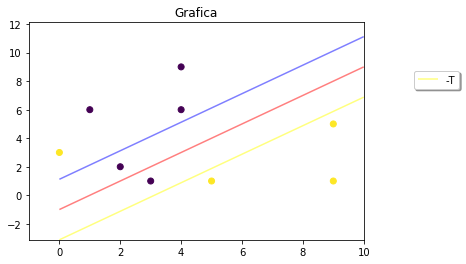

In [16]:
ax = plt.subplot(111)
plt.scatter(X[:,0], X[:,1], c=y[:,0])
plt.title("Grafica")

c1 = ax.contour(XX, YY, h1(XX,YY), levels=[0],colors='red', alpha=0.5)

lines=[c1.collections[0]]
labels=['H1']
ax.legend(lines,labels,loc='upper right', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1)
# plt.show()

m_superior = ax.contour(XX, YY+m_optimo, h1(XX,YY), levels=[0],colors='blue', alpha=0.5)


m_inferior = ax.contour(XX, YY-m_optimo, h1(XX,YY), levels=[0],colors='yellow', alpha=0.5)

lines=[m_superior.collections[0]]
labels=['+T']
ax.legend(lines,labels,loc='upper right', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1)

lines=[m_inferior.collections[0]]
labels=['-T']
ax.legend(lines,labels,loc='upper right', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1)
plt.show()


**8. Identifique los ejemplos que son separables y los que no lo son, Luego, determine los ejemplos que son clasificados correctamente y los que no.**

Para verificar que un ejemplo $i$ es separable, debe cumplir la siguiente restriccion:
$$R_i = y_i(w^T x^{(i)}) \geq 1$$
Se calcula dicha restriccion a continuacion de forma vectorial.

In [17]:
R = y*np.dot(X,w1)
columns_new = ['x1', 'x2','Ri']
pd.DataFrame(np.append(X,R,axis=1), columns=columns_new)

,x1,x2,Ri
0,1,6,5
1,4,9,5
2,4,6,2
3,5,1,4
4,9,5,4
5,9,1,8
6,0,3,-3
7,2,2,0
8,3,1,-2


Podemos observar que los ejemplos 6 y 8 (S=-3, S=-2) 
no cumplen la restriccion, por lo tanto estos son no separables, mientras que los demas ejemplos si son separables.

**9. Calcule la holgura de los ejemplos no separables.**

Si graficamos el hiperplano optimo H1(Calculado en el ejercicio 4) y el margen tendriamos la siguiente grafica.

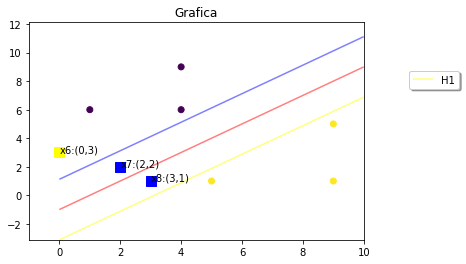

In [28]:
ax = plt.subplot(111)
plt.scatter(X[:,0], X[:,1], c=y[:,0])
plt.title("Grafica")

c1 = ax.contour(XX, YY, h1(XX,YY), levels=[0],colors='red', alpha=0.5)

lines=[c1.collections[0]]
labels=['H1']
ax.legend(lines,labels,loc='upper right', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1)
# plt.show()

m_superior = ax.contour(XX, YY+m_optimo, h1(XX,YY), levels=[0],colors='blue', alpha=0.5)


m_inferior = ax.contour(XX, YY-m_optimo, h1(XX,YY), levels=[0],colors='yellow', alpha=0.5)

lines=[m_superior.collections[0]]
# labels.append(['+T'])
# ax.legend(lines,labels,loc='upper right', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1)

lines=[m_inferior.collections[0]]
# labels.append(['-T'])


plt.plot([0], [3], marker='s', markersize=10, color="yellow")
plt.plot([2], [2], marker='s', markersize=10, color="blue")
plt.plot([3], [1], marker='s', markersize=10, color="blue")
ax.annotate('x6:(0,3)', (X[:,0][6], X[:,1][6]))
ax.annotate('x7:(2,2)', (X[:,0][7], X[:,1][7]))
ax.annotate('x8:(3,1)', (X[:,0][8], X[:,1][8]))
ax.legend(lines,labels,loc='upper right', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1)
plt.show()



Podemos observar que los puntos $x_6=(0,3),x_7=(2,2),x_8=(3,1)$ son los ejemplos no separables. Para calcular las holguras calculamos la disteancia de un punto a un hiperplano (en este caso los hyperplanos son los margenes).
$$\frac{|D({x^i})|}{||w||}$$

Definimos los ecuaciones de los margenes del hiperplano optimo $H1$:
- Hiperplano superior:
$$H_{sup} = w_1^T x^{(i)}+b_1+\tau$$
- Hiperplano inferior:
$$H_{inf} = w_1^T x^{(i)}+b_1-\tau$$

A continuacion calculamos las holguras:
- Para $x_6=(0,3)$:
$$\xi_6 = \frac{|H_{inf}({x^6})|}{||w_1||} = w_1^T x_6+b_1-\tau$$

- Para $x_7=(2,2)$:
$$\xi_7 = \frac{|H_{sup}({x^6})|}{||w_1||}=w_1^T x_7+b_1+\tau$$

- Para $x_8=(3,1)$:
$$\xi_8 = \frac{|H_{sup}({x^6})|}{||w_1||}=w_1^T x_8+b_1+\tau$$

De los ejercicios anteriores conocemos los valores de $w_1$, $b_1$ y $\tau$
$$w_1=\begin{bmatrix}1 \\\ -1\end{bmatrix}, b_1=\begin{bmatrix}-1 \\\ -1\end{bmatrix}, \tau = 2.121320$$

Reemplazando en las ecuaciones anteriores obtenemos las holguras:
- Para $x_6=(0,3)$:
$$\xi_6 = 4.32842712$$

- Para $x_7=(2,2)$:
$$\xi_7 = 0.79289322$$

- Para $x_8=(3,1)$:
$$\xi_8 = 2.20710678$$

Podemos observar que el ejemplo $x_6$ es mal clasificado ya que su holgura es mayor a $1$, mientras que los ejemplos $x_7$ y $x_8$ son bien clasificados debido a que sus holguras son mayores a $0$.

In [20]:
E = y*(np.dot(X,w1)+b1)
pc = y*(np.dot(X,w1)+b1)
columns_new = ['x1', 'x2','Ri','1-Ei']
data = np.append(X,pc,axis=1)
data = np.append(data,E,axis=1)
pd.DataFrame(data, columns=columns_new)

holgura1 = np.abs(np.dot(X[6],w1)+b1-m_optimo)*(1/(np.linalg.norm(w1)))
holgura2 = np.abs(np.dot(X[7],w1)+b1+m_optimo)*(1/(np.linalg.norm(w1)))
holgura3 = np.abs(np.dot(X[8],w1)+b1+m_optimo)*(1/(np.linalg.norm(w1)))
holgura1,holgura2,holgura3,m_optimo

(array([4.32842712]),
 array([0.79289322]),
 array([2.20710678]),
 2.1213203435596424)

Podemos observar que para los ejemplos 6 y 8 las holguras son mayores que cero.
- Para $x_6$: $$1-\xi_6 = -4$$ 
    $$\xi_6 = 5$$
- Para $x_8$: $$1-\xi_8 = -1$$

## II. Preguntas de Investigacion

**10. Explique el significado de la constante C en el termino $\sum_{i=1}E_i$ que se agrega a la funcion objetivo en el caso de ejemplos casi linealmente separables. Luego, explique la influencia de C en la capacidad de generalizacion de una SVM.**


Sabemos que para encontrar el hiperplano de separacion optimo debemos maximizar el margen (o minimizar $w$) mediante la minimizacion de la siguiente funcion.

$$f(w,E) = \frac{1}{2}||w||^2 + C\sum_{i=1}^{n} E_i$$

La constante C regresenta el parametro de regularizacion del modelo para "evitar" errores en la calsificacion , este parametro controla el grado de influencia del termino. Esto se debe a que al asignarle un valor grande al parametro en un problema de minimizacion este sera descartado rapidamente.


**11. Describa el significado del parametro γ en el kernel gaussiano. Luego, explique la influencia de γ en la capacidad de generalizacion de una SVM.**

## III. Implementacion

**12. Usando el Scikit-learn de Python, implemente (comente su codigo) una SVM que clasifique un conjunto de datos.**


Para este ejercicio usare el dataset de "datos de iris" para predecir la categoria la categoria a la que pertenece una planta segun 4 caracterisiticas: ancho de sepalo, largo de sepalo, ancho de petalo y largo de petalo.
El dataset puede descargarse del siguiente enlace:
https://archive.ics.uci.edu/ml/datasets/iris

El modelo usado para este ejercicio es un SVM con un kernel polinomico. 

Para entrenar un modelo SVM con Scikit-learn seguire los siguientes pasos:
- Importar el conjunto de datos
- Preprocesar los datos
- Dividir el dataset para realizar validacion cruzada
- Entrenar el modelo
- Hacer predicciones

### 1. Importar el dataset

Importamos el dataset y mostramos los primeros 3 registros del mismo, ademas calculamos el numero de ejemplos de entrenamiento del dataset y las categorias de las etiquetas.

In [29]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Asignamos nombres a las columnas
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Leer el dataset en un datframe de panda
irisdata = pd.read_csv(url, names=colnames)  

In [30]:
# a continuacion visualizamos los primeros 3 registros 
irisdata.head(3)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [31]:
#numero de ejemplos en el dataset
print('numero de ejemplos de entrenamiento: ',irisdata.shape[0])
#numero de caracteristicas en el dataset
print('numero de caracterisiticas: ',irisdata.shape[1]-1)
#numero de categorias en el dataset
print("categorias: ", irisdata.Class.unique())

numero de ejemplos de entrenamiento:  150
numero de caracterisiticas:  4
categorias:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### 2. Preprocesamiento

En esta parte separamos el dataset en los datos de entrada y las etiquetas por separado.

In [32]:
#Obtener del dataset los ejemplos y etiquetas como series separadas
X = irisdata.drop('Class', axis=1)  
y = irisdata['Class']

### 3. Division del dataset

En esta parte dividimos el dataset en dos conjuntos, uno para entrenar los modelos y otro para evaluarlos. El 80% sera para entrenamiento, mientras que el 20% restante sera para evaluacion.

In [33]:
# dividiremos el dataset usando el 80% de datos para entrenamiento y 
# el restante 20% para las pruebas
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

### 4. Entrenamiento

En este paso entrenamos el modelo con el conjunto de entrenamiento.

In [34]:
#Para este ejercicio empleare un kernel polinomial
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly', degree=8)  
#entrenamiento
svclassifier.fit(X_train, y_train) 

/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### 5.Predicciones y evaluacion 

Para evaluar la precision del modelo se procede a calcular la precision de las predicciones. Para ello se realiza las predicciones usando el conjunto de evaluacion. Se optiene una precision del 90% para el modelo implementado.

In [36]:
#Predicciones
y_pred = svclassifier.predict(X_test)  
#Evaluacion
from sklearn.metrics import classification_report
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8666666666666667


**13. Experimente y muestre resultados usando diferentes valores para los parametros de los kernels: lineal,polinomial, gaussiano, y el parametro C. Los resultados deben ser mostrados en el documento pdf.**

Para cada kernel elegido se procede a entrenar un nuevo modelo y a evaluarlo con el conjunto de prueba para obtener la precision de las predicciones.

### Kernel Gaussiano

In [37]:
from sklearn.svm import SVC 
svclassifier1 = SVC(kernel='rbf')  
svclassifier1.fit(X_train, y_train)  
#realizar predicciones
y_pred = svclassifier1.predict(X_test)
#evaluacion
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9666666666666667


/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Kernel Sigmoideo

In [38]:
from sklearn.svm import SVC 
svclassifier2 = SVC(kernel='sigmoid')  
svclassifier2.fit(X_train, y_train) 
#realizar predicciones
y_pred = svclassifier2.predict(X_test)
#evaluacion
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.26666666666666666


/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Kernel Lineal

In [39]:
from sklearn.svm import SVC 
svclassifier3 = SVC(kernel='linear')  
svclassifier3.fit(X_train, y_train)
#realizar predicciones
y_pred = svclassifier3.predict(X_test)
#evaluacion 
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9666666666666667


### Analisis
Si observamos la precision producidos por lso diferentes tipos de kernels, podemos ver que la peor precision la obtiene el kernel sigmoideo, esto es debido a la dimension de las categorias, que en este dataset se tienen 3 categorias pero la kernel sigmoideo devuelve dos valores. De todos los kernels usados, el kernel polinomico y lineal tienen las mas altas precisiones (Polinomico=100%, lineal=96.6%)

In [ ]:
## Codigo Fuente